In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/fruit-and-vegetable-image-recognition'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [6]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import os.path
import matplotlib.pyplot as plt 
%matplotlib inline 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import load_img , img_to_array
print (tf.__version__)

2.16.1


In [11]:
train_dir = Path('/kaggle/input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'*/*.jpg'))
# print (train_filepaths)

In [12]:
validation_dir = Path('/kaggle/input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(validation_dir.glob(r'*/*.jpg'))

In [13]:
test_dir = Path('/kaggle/input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'*/*.jpg'))

In [14]:
def image_preprocessing(filepath):
    labels = [str(filepath[i]).split('/')[-2] for i in range (len(filepath))]
    filepath = pd.Series(filepath , name = 'Filepath').astype(str)
    labels = pd.Series(labels , name= 'Label')
    df = pd.concat([filepath , labels] , axis = 1)
    df = df.sample(frac=1).reset_index(drop=True)
    return df 

In [15]:
train_df = image_preprocessing(train_filepaths)
test_df = image_preprocessing(test_filepaths)
val_df = image_preprocessing(val_filepaths)

In [16]:
print ('training set \n')
print(f'number of pictures :{train_df.shape[0]}\n')
print(f'number of different labels :{len(train_df.Label.unique())}\n')
print(f'labels : {train_df.Label.unique()}')


training set 

number of pictures :2780

number of different labels :36

labels : ['onion' 'pomegranate' 'beetroot' 'cauliflower' 'sweetpotato' 'pineapple'
 'apple' 'garlic' 'chilli pepper' 'paprika' 'bell pepper' 'tomato'
 'potato' 'corn' 'kiwi' 'carrot' 'grapes' 'sweetcorn' 'pear' 'lemon'
 'turnip' 'mango' 'cabbage' 'ginger' 'capsicum' 'lettuce' 'raddish'
 'soy beans' 'eggplant' 'peas' 'cucumber' 'orange' 'spinach' 'banana'
 'jalepeno' 'watermelon']


In [17]:
train_df.head(10)

,Filepath,Label
0,/kaggle/input/fruit-and-vegetable-image-recogn...,onion
1,/kaggle/input/fruit-and-vegetable-image-recogn...,pomegranate
2,/kaggle/input/fruit-and-vegetable-image-recogn...,beetroot
3,/kaggle/input/fruit-and-vegetable-image-recogn...,cauliflower
4,/kaggle/input/fruit-and-vegetable-image-recogn...,sweetpotato
5,/kaggle/input/fruit-and-vegetable-image-recogn...,pineapple
6,/kaggle/input/fruit-and-vegetable-image-recogn...,apple
7,/kaggle/input/fruit-and-vegetable-image-recogn...,garlic
8,/kaggle/input/fruit-and-vegetable-image-recogn...,garlic
9,/kaggle/input/fruit-and-vegetable-image-recogn...,chilli pepper


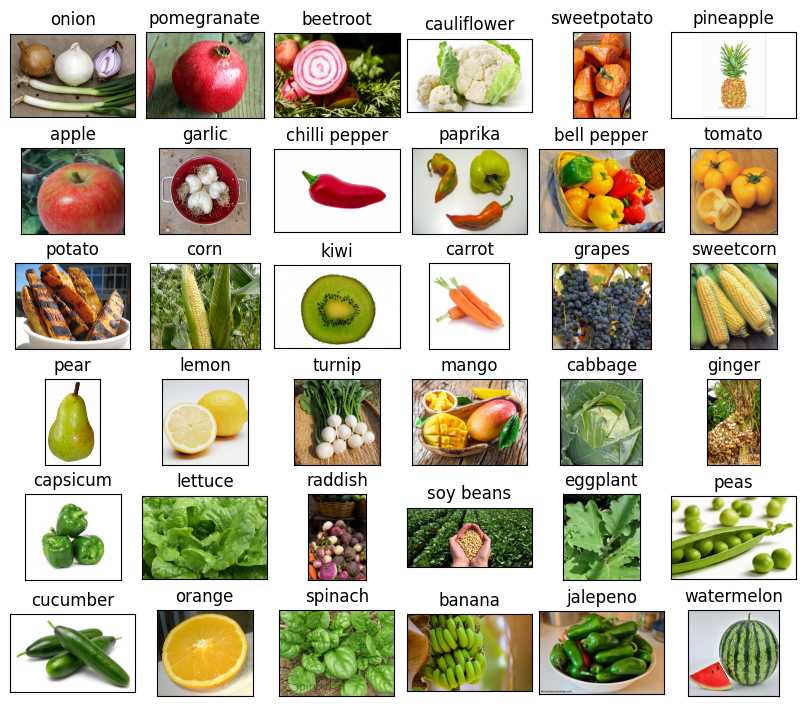

In [19]:
df_unique = train_df.copy().drop_duplicates(subset= ['Label']).reset_index()
fig , axes = plt.subplots(nrows = 6 , ncols=6 , figsize = (8,7), subplot_kw = {'xticks':[] , 'yticks':[]})
for i , ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i] ,fontsize = 12)
    
plt.tight_layout(pad = 0.5)
plt.show()

In [22]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input
)

In [24]:
train_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32 ,
    shuffle = True ,
    seed = 0 ,
    rotation_range = 30 ,
    zoom_range = 0.15 ,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    shear_range = 0.15 ,
    horizzontal_flip = True ,
    fill_mode = 'nearest'
)

Found 2780 validated image filenames belonging to 36 classes.


In [25]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [26]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [27]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3) ,
                                                     include_top=False ,
                                                     weights='imagenet',
                                                     pooling='avg'
                                                    
                                                    )
pretrained_model.trainable = False 

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128 , activation = 'relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128 , activation= 'relu')(x)

outputs = tf.keras.layers.Dense(36 , activation='softmax')(x)
model = tf.keras.Model(inputs = inputs ,outputs= outputs)

model.compile (loss = 'categorical_crossentropy' ,
               optimizer='adam',
               metrics=['accuracy']
              
              )

In [29]:
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725495801.162118    2436 service.cc:145] XLA service 0x7a5f7800f560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725495801.162195    2436 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725495801.162205    2436 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/87 ━━━━━━━━━━━━━━━━━━━━ 28:07 20s/step - accuracy: 0.0000e+00 - loss: 3.6419

I0000 00:00:1725495807.357487    2436 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


87/87 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.3610 - loss: 2.4604 - val_accuracy: 0.8743 - val_loss: 0.4227
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 70s 764ms/step - accuracy: 0.8274 - loss: 0.5289 - val_accuracy: 0.9132 - val_loss: 0.3017
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 70s 753ms/step - accuracy: 0.8951 - loss: 0.3355 - val_accuracy: 0.9132 - val_loss: 0.2333
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 71s 776ms/step - accuracy: 0.9319 - loss: 0.2130 - val_accuracy: 0.9491 - val_loss: 0.1996
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 70s 753ms/step - accuracy: 0.9615 - loss: 0.1389 - val_accuracy: 0.9341 - val_loss: 0.2458


In [30]:
pred = model.predict(test_images)
pred = np.argmax(pred ,axis =1 )
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred ]
pred1 

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step


['paprika',
 'jalepeno',
 'banana',
 'kiwi',
 'spinach',
 'bell pepper',
 'soy beans',
 'beetroot',
 'cabbage',
 'sweetcorn',
 'cauliflower',
 'apple',
 'pear',
 'cucumber',
 'pomegranate',
 'cauliflower',
 'sweetcorn',
 'cabbage',
 'pear',
 'cabbage',
 'cucumber',
 'paprika',
 'jalepeno',
 'cauliflower',
 'garlic',
 'cucumber',
 'potato',
 'pomegranate',
 'lettuce',
 'beetroot',
 'garlic',
 'chilli pepper',
 'grapes',
 'lemon',
 'corn',
 'pear',
 'jalepeno',
 'capsicum',
 'bell pepper',
 'garlic',
 'onion',
 'garlic',
 'orange',
 'corn',
 'tomato',
 'sweetcorn',
 'kiwi',
 'carrot',
 'apple',
 'pineapple',
 'sweetcorn',
 'beetroot',
 'turnip',
 'cabbage',
 'soy beans',
 'tomato',
 'kiwi',
 'tomato',
 'pear',
 'cucumber',
 'pineapple',
 'jalepeno',
 'capsicum',
 'sweetpotato',
 'pear',
 'potato',
 'grapes',
 'onion',
 'watermelon',
 'capsicum',
 'capsicum',
 'cauliflower',
 'cabbage',
 'grapes',
 'onion',
 'onion',
 'apple',
 'tomato',
 'carrot',
 'ginger',
 'mango',
 'chilli pepper',
 

In [31]:
def output(location):
    img = load_img(location , target_size=(224,224,3))
    img = img_to_array(img)
    img= img / 255
    img = np.expand_dims(img ,[0])
    answer = model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = ' '.join(str(x) for x in y_class)
    y  = int(y)
    res = labels[y]
    return res

In [35]:
img = output('/kaggle/input/fruit-and-vegetable-image-recognition/test/pear/Image_10.jpg')
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


'pear'

In [36]:
model.save('FV.h5')